In [1]:
# A linear regression learning algorithm example using TensorFlow library.

# Author: Aymeric Damien
# Project: https://github.com/aymericdamien/TensorFlow-Examples/

In [2]:
import tensorflow as tf
import numpy
import matplotlib.pyplot as plt
rng = numpy.random

/usr/local/lib/python2.7/dist-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [3]:
# Parameters
learning_rate = 0.01
training_epochs = 1000
display_step = 50

In [4]:
# Training Data
train_X = numpy.asarray([3.3,4.4,5.5,6.71,6.93,4.168,9.779,6.182,7.59,2.167,
                         7.042,10.791,5.313,7.997,5.654,9.27,3.1])
train_Y = numpy.asarray([1.7,2.76,2.09,3.19,1.694,1.573,3.366,2.596,2.53,1.221,
                         2.827,3.465,1.65,2.904,2.42,2.94,1.3])
n_samples = train_X.shape[0]

In [5]:
# tf Graph Input
X = tf.placeholder("float")
Y = tf.placeholder("float")

# Set model weights
W = tf.Variable(rng.randn(), name="weight")
b = tf.Variable(rng.randn(), name="bias")

In [6]:
# Construct a linear model
pred = tf.add(tf.mul(X, W), b)

In [7]:
# Mean squared error
cost = tf.reduce_sum(tf.pow(pred-Y, 2))/(2*n_samples)
# Gradient descent
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

In [8]:
# Initializing the variables
init = tf.initialize_all_variables()

Epoch: 0050 cost= 0.077980772 W= 0.267399 b= 0.673373
Epoch: 0100 cost= 0.077865049 W= 0.26634 b= 0.680992
Epoch: 0150 cost= 0.077762723 W= 0.265344 b= 0.688157
Epoch: 0200 cost= 0.077672333 W= 0.264407 b= 0.694896
Epoch: 0250 cost= 0.077592425 W= 0.263526 b= 0.701235
Epoch: 0300 cost= 0.077521816 W= 0.262698 b= 0.707196
Epoch: 0350 cost= 0.077459432 W= 0.261918 b= 0.712803
Epoch: 0400 cost= 0.077404283 W= 0.261185 b= 0.718077
Epoch: 0450 cost= 0.077355608 W= 0.260496 b= 0.723037
Epoch: 0500 cost= 0.077312581 W= 0.259847 b= 0.727702
Epoch: 0550 cost= 0.077274583 W= 0.259237 b= 0.732089
Epoch: 0600 cost= 0.077241011 W= 0.258664 b= 0.736216
Epoch: 0650 cost= 0.077211365 W= 0.258124 b= 0.740098
Epoch: 0700 cost= 0.077185214 W= 0.257617 b= 0.743748
Epoch: 0750 cost= 0.077162080 W= 0.257139 b= 0.747182
Epoch: 0800 cost= 0.077141672 W= 0.256691 b= 0.750412
Epoch: 0850 cost= 0.077123657 W= 0.256268 b= 0.753449
Epoch: 0900 cost= 0.077107765 W= 0.255871 b= 0.756306
Epoch: 0950 cost= 0.077093728

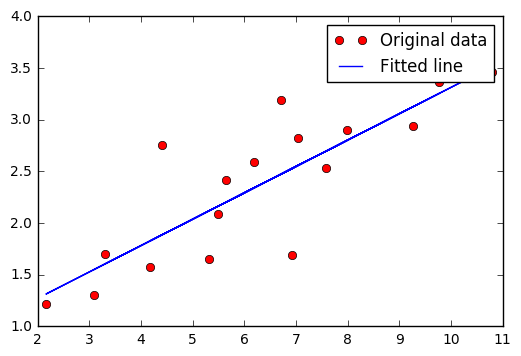

In [9]:
# Launch the graph
with tf.Session() as sess:
    sess.run(init)

    # Fit all training data
    for epoch in range(training_epochs):
        for (x, y) in zip(train_X, train_Y):
            sess.run(optimizer, feed_dict={X: x, Y: y})

        #Display logs per epoch step
        if (epoch+1) % display_step == 0:
            c = sess.run(cost, feed_dict={X: train_X, Y:train_Y})
            print "Epoch:", '%04d' % (epoch+1), "cost=", "{:.9f}".format(c), \
                "W=", sess.run(W), "b=", sess.run(b)

    print "Optimization Finished!"
    training_cost = sess.run(cost, feed_dict={X: train_X, Y: train_Y})
    print "Training cost=", training_cost, "W=", sess.run(W), "b=", sess.run(b), '\n'

    #Graphic display
    plt.plot(train_X, train_Y, 'ro', label='Original data')
    plt.plot(train_X, sess.run(W) * train_X + sess.run(b), label='Fitted line')
    plt.legend()
    plt.show()